# Simulating a Predator and Prey Relationship

Without a predator, rabbits will reproduce until they reach the carrying capacity of the land. When coyotes show up, they will eat the rabbits and reproduce until they can't find enough rabbits. We will explore the fluctuations in the two populations over time.

# Using Lotka-Volterra Model

## Part 1: Rabbits without predators

According to [Mother Earth News](https://www.motherearthnews.com/homesteading-and-livestock/rabbits-on-pasture-intensive-grazing-with-bunnies-zbcz1504), a rabbit eats six square feet of pasture per day. Let's assume that our rabbits live in a five acre clearing in a forest: 217,800 square feet/6 square feet = 36,300 rabbit-days worth of food. For simplicity, let's assume the grass grows back in two months. Thus, the carrying capacity of five acres is 36,300/60 = 605 rabbits.

Female rabbits reproduce about six to seven times per year. They have six to ten children in a litter.  According to [Wikipedia](https://en.wikipedia.org/wiki/Rabbit), a wild rabbit reaches sexual maturity when it is about six months old and typically lives one to two years. For simplicity, let's assume that in the presence of unlimited food, a rabbit lives forever, is immediately sexually mature, and has 1.5 children every month.

For our purposes, then, let $x_t$ be the number of rabbits in our five acre clearing on month $t$.
$$
\begin{equation*}
  R_t = R_{t-1} + 1.5\frac{605 - R_{t-1}}{605} R_{t-1}
\end{equation*}
$$

The formula could be put into general form
$$
\begin{equation*}
  R_t = R_{t-1} + growth_{R} \times \big( \frac{capacity_{R} - R_{t-1}}{capacity_{R}} \big) R_{t-1}
\end{equation*}
$$

By doing this, we allow users to interact with growth rate and the capacity value visualize different interaction 


In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

FloatText(value=1.0, description='Initial population', style=DescriptionStyle(description_width='initial'))

FloatText(value=605.0, description='Capacity')

FloatText(value=1.5, description='Growth rate')

Button(description='Plot Graph', style=ButtonStyle())

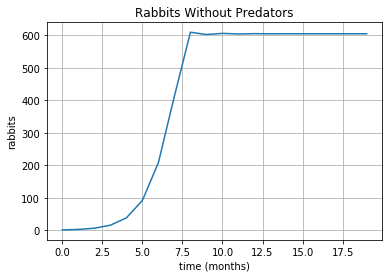

In [7]:
%matplotlib inline
style = {'description_width': 'initial'}
capacity_R = widgets.FloatText(description="Capacity", value=605)
growth_rate_R = widgets.FloatText(description="Growth rate", value=1.5)
initial_R = widgets.FloatText(description="Initial population",style=style, value=1)
button_R = widgets.Button(description="Plot Graph")
display(initial_R, capacity_R, growth_rate_R, button_R)

def plot_graph_r(b):
    print("helo")
    clear_output()
    display(initial_R, capacity_R, growth_rate_R, button_R)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = np.arange(0, 20, 1)
    s = np.zeros(t.shape)
    R = initial_R.value
    for i in range(t.shape[0]):
        s[i] = R
        R = R + growth_rate_R.value * (capacity_R.value - R)/(capacity_R.value) * R
        
    ax.plot(t, s)
    ax.set(xlabel='time (months)', ylabel='rabbits',
       title='Rabbits Without Predators')
    ax.grid()

button_R.on_click(plot_graph_r)

## Part 2: Coyotes without preys
According to [Huntwise](https://www.besthuntingtimes.com/blog/2020/2/3/why-you-should-coyote-hunt-how-to-get-started), coyotes need to consume about 2-3 pounds of food per day. Their diet is 90 percent mammalian. The perfect adult cottontail rabbits weigh 2.6 pounds on average. Thus, we assume the coyote eats one rabbit per day. 

For coyotes, the breeding season is in February and March. According to [Wikipedia](https://en.wikipedia.org/wiki/Coyote#Social_and_reproductive_behaviors), females have a gestation period of 63 days, with an average litter size of 6, though the number fluctuates depending on coyote population density and the abundance of food. By fall, the pups are old enough to hunt for themselves.

In the absence of rabbits, the number of coyotes will drop, as their food supply is scarce.
The formula could be put into general form:

$$
\begin{align*}
  C_t & \sim (1 - death_{C}) \times C_{t-1}\\
  &= C_{t-1} - death_{C} \times C_{t-1}
\end{align*}
$$



FloatText(value=200.0, description='Initial Population', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.5, description='Death rate')

Button(description='Plot Graph', style=ButtonStyle())

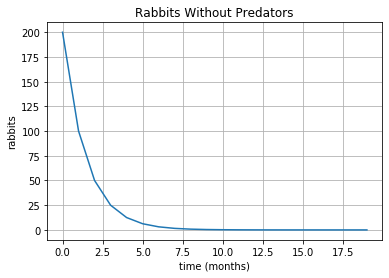

In [8]:
%matplotlib inline
style = {'description_width': 'initial'}
initial_C=widgets.FloatText(description="Initial Population",style=style,value=200.0)
declining_rate_C=widgets.FloatText(description="Death rate",value=0.5)
button_C=widgets.Button(description="Plot Graph")
display(initial_C, declining_rate_C, button_C)

def plot_graph_c(b):
    clear_output()
    display(initial_C, declining_rate_C, button_C)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t1 = np.arange(0, 20, 1)
    s1 = np.zeros(t1.shape)
    C = initial_C.value
    for i in range(t1.shape[0]):
        s1[i] = C
        C = (1 - declining_rate_C.value)*C
        
    ax.plot(t1, s1)
    ax.set(xlabel='time (months)', ylabel='rabbits',
       title='Rabbits Without Predators')
    ax.grid()

button_C.on_click(plot_graph_c)


## Part 3: Interaction Between Coyotes and Rabbit
With the simple interaction from the first two parts, now we can combine both interaction and come out with simple interaction.
$$
\begin{align*}
  R_t &= R_{t-1} + growth_{R} \times \big( \frac{capacity_{R} - R_{t-1}}{capacity_{R}} \big) R_{t-1} - death_{R}(C_{t-1})\times R_{t-1}\\\\
  C_t &= C_{t-1} - death_{C} \times C_{t-1} + growth_{C}(R_{t-1}) \times C_{t-1}
\end{align*}
$$

In equations above, death rate of rabbit is a function parameterized by the amount of coyote. Similarly, the growth rate of coyotes is a function parameterized by the amount of the rabbit.

The death rate of the rabbit should be $0$ if there are no coyotes, while it should approach $1$ if there are many coyotes. One of the formula fulfilling this characteristics is hyperbolic function.

$$
\begin{equation}
death_R(C) = 1 - \frac{1}{xC + 1}
\end{equation}
$$

where $x$ determines how quickly $death_R$ increases as the number of coyotes ($C$) increases. Similarly, the growth rate of the coyotes should be $0$ if there are no rabbits, while it should approach infinity if there are many rabbits. One of the formula fulfilling this characteristics is a linear function.

$$
\begin{equation}
growth_C(R) = yC
\end{equation}
$$

where $y$ determines how quickly $growth_C$ increases as number of rabbit ($R$) increases.

Putting all together, the final equtions are

$$
\begin{align*}
  R_t &= R_{t-1} + growth_{R} \times \big( \frac{capacity_{R} - R_{t-1}}{capacity_{R}} \big) R_{t-1} - \big( 1 - \frac{1}{xC_{t-1} + 1} \big)\times R_{t-1}\\\\
  C_t &= C_{t-1} - death_{C} \times C_{t-1} + yR_{t-1}C_{t-1}
\end{align*}
$$



FloatText(value=1.0, description='Initial Rabbit')

FloatText(value=1.0, description='Initial Coyote')

FloatText(value=5.0, description='capacity_R')

FloatText(value=1.0, description='growth_R')

FloatText(value=1.0, description='death_C')

FloatText(value=1.0, description='x')

FloatText(value=1.0, description='y')

Button(description='Plot Graph', style=ButtonStyle())

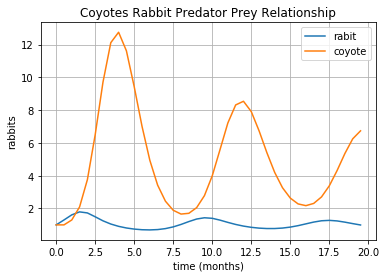

In [9]:
%matplotlib inline
initial_rabbit = widgets.FloatText(description="Initial Rabbit", value=1)
initial_coyote = widgets.FloatText(description="Initial Coyote", value=1)
capacity = widgets.FloatText(description="capacity_R", value=5)
growth_rate = widgets.FloatText(description="growth_R", value=1)
death_rate = widgets.FloatText(description="death_C", value=1)
x = widgets.FloatText(description="x", value=1)
y = widgets.FloatText(description="y", value=1)
button = widgets.Button(description="Plot Graph")
display(initial_rabbit, initial_coyote, capacity, growth_rate, death_rate, x, y, button)
def plot_graph(b):
    clear_output()
    display(initial_rabbit, initial_coyote, capacity, growth_rate, death_rate, x, y, button)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = np.arange(0, 20, 0.5)
    s = np.zeros(t.shape)
    p = np.zeros(t.shape)
    R = initial_rabbit.value
    C = initial_coyote.value
    for i in range(t.shape[0]):
        s[i] = R
        p[i] = C
        R = R + growth_rate.value * (capacity.value - R)/(capacity.value) * R - (1 - 1/(x.value*C + 1))*R
        C = C - death_rate.value * C  + y.value*s[i]*C
        
    ax.plot(t, s, label="rabit")
    ax.plot(t, p, label="coyote")
    ax.set(xlabel='time (months)', ylabel='rabbits',
       title='Coyotes Rabbit Predator Prey Relationship')
    ax.grid()
    ax.legend()

button.on_click(plot_graph)

## Using ABM simulation
In ABMs of ecological and evolutionary dynamics, prey naturally grow but get eaten by predators, while the predators grow if they get prey, but naturally die off if they can't find any food. 
In our ABM simulation model, we will randomly choosing an agent to update the system's state in an asynchronous manner.
### Design the data structure to store the attributes of the the prey and predators
The information about about agent type must be represented in the data structure, also in order to simulate the interactions in a spacel, the information about the agents spatial location is also needed. In the code, we use r_init and c_init to represent the initial population of rabbits and coyotes. The for loop iterates r_init + c_init times, and in the first r_init iteration, the prey agents are generated, while the predator agents are generated for the rest.

In [4]:
r_init = 100 # initial rabbit population 
c_init = 30 #initial coyotes population

class agent:
    pass

def initialize():
    global agents,rdata, cdata
    agents = []
    rdata = []
    cdata = []
    for i in range(r_init + c_init):
        ag = agent()
        ag.type = 'r' if i < r_init else 'c'
        ag.x = random()
        ag.y = random()
        agents.append(ag)
        

### The rules for how prey and predators behave on their own:
If a prey agent meets a predator agent, it dies with some probability because of predation. We will implement death as the removal of the prey from the preys agents list.
If a predator agent can't find any prey agents nearby, it dies with some probability because of the lack of food. Otherwise, it will reproduce at a certain reproduction rate. 
According to [Purely Facts](http://purelyfacts.com/question/12/which-is-faster-a-coyote-or-a-rabbit?DDA=28&DDB=98),  the top speed is roughly 64 kph for coyote, and 4 kph for rabbit, so let's assume coyotes are 15 times faster than rabbit. Furthermore, to ensure our simulation model can naturally handle situations where the size of the agent population changes rapidly, and guarantees that each agent is updated once, on average, in each unit time length, we defined a update_one_unit_time() function to address the issue. We make the unit length of time passes by in each asynchronous updating proportional to the size of the agent populationat the time of updating. This way, the progress of time will be steady in the simulation, even if the number of agents changes over time.

In [5]:
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import copy as cp

nr = 605 # capacity of rabbits

mr = 0.03 # magnitude of movement of rabbits
dr = 0.95 #death rate of rabbits when it faces coyotes
rr = 0.1 # reproduction rate of rabbits

mc = mr * 15 # magnitude of movement of coyotes
dc = 0.1 # death rate of coyotes when there is no rabbit
rc = 0.6 # reproductioin rate of coyotes

cd = 0.05 # radius for collision detection
cdsq = cd**2

def update():
    global agents
    if agents == []: # Avoiding the possibility for all agents to die out in ecological ABMs
        return
    ag = agents[randint(len(agents))]
    
    #simulating random movement
    m = mr if ag.type == 'r' else mc
    ag.x += uniform(-m, m)
    ag.y += uniform(-m, m)
    ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
    ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y
    
    # Detecting collision and simulating death or birth
    neighbors = [nb for nb in agents if (ag.x - nb.x)**2 +(ag.y - nb.y)**2 < cdsq and nb.type != ag.type]
    if ag.type == 'r':
        if len(neighbors) > 0: #if there are coyotes nearby
            if random() < dr:
                agents.remove(ag)
                return
        if random() < rr * (1 - sum([1 for x in agents if x.type == 'r'])/nr):
            #The logistic-type growth restriction is implemented 
            agents.append(cp.copy(ag))
            return
        
        
    else:
        if len(neighbors) == 0: # If there are no rabbits nearby
            if random() < dc:
                agents.remove(ag)
                return
        else:
            if random() < rc:
                agents.append(cp.copy(ag))
                return


def observe():
    global agents, rdata, cdata
    cla()
    subplot(1, 2 , 1)
    rabbits = [ag for ag in agents if ag.type == 'r']
    rdata.append(len(rabbits))
    if len(rabbits) > 0:
        x = [ag.x for ag in rabbits]
        y = [ag.y for ag in rabbits]
        plot(x,y,'k.')
    coyotes = [ag for ag in agents if ag.type == 'c']
    cdata.append(len(coyotes))
    if len(coyotes) > 0:
        x = [ag.x for ag in coyotes]
        y = [ag.y for ag in coyotes]
        plot(x,y,'ro')
    axis('image')
    axis([0,1,0,1])
    
    subplot(1, 2, 2)
    cla()
    plot(rdata, label ='prey')
    plot(cdata, label = 'predator')
    legend()
                
def update_one_unit_time():
    global agents
    t = 0
    while t < 1:
        t += 1.0 / len(agents)
        update()
import pycxsimulator
pycxsimulator.GUI().start(func = [initialize, observe, update_one_unit_time])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut